In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("Titanic_dataset.csv")

In [6]:
df.head()

,Age,Class/Dept,Fare today,Joined,Survived
0,29.0,1st Class,16300.0,Southampton,True
1,0.9,1st Class,11700.0,Southampton,True
2,2.0,1st Class,11700.0,Southampton,False
3,30.0,1st Class,11700.0,Southampton,False
4,25.0,1st Class,11700.0,Southampton,False


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d3f2d37d0>,
      dtype=object)

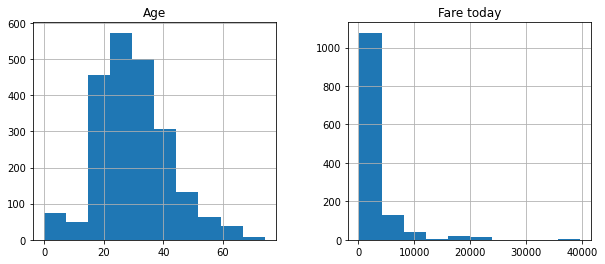

In [8]:
features = ["Age", "Fare today"]
df[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d3ed3cb90>,
      dtype=object)

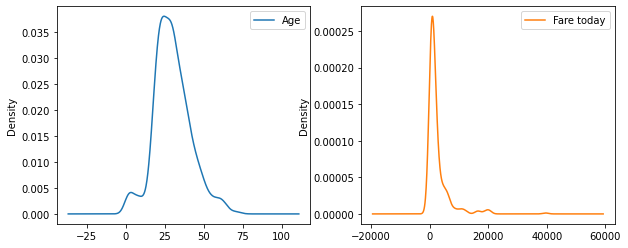

In [9]:
df[features].plot(kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


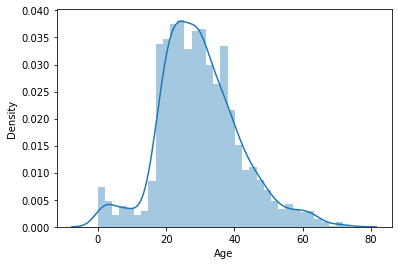

In [10]:
sns.distplot(df["Age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


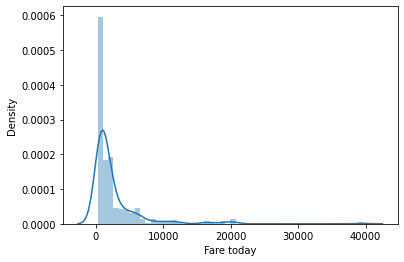

In [11]:
sns.distplot(df["Fare today"])

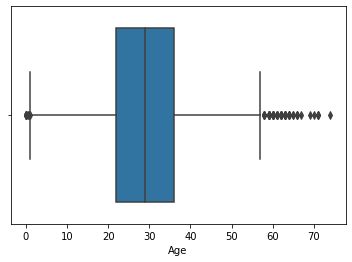

In [12]:
sns.boxplot(x="Age", data=df)

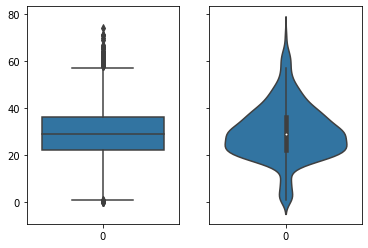

In [16]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Age"], ax=axes[0])
sns.violinplot(data=df["Age"], ax=axes[1])

In [17]:
df[features].describe()

,Age,Fare today
count,2199.000000,1291.000000
mean,29.915916,2606.477924
std,11.783092,4032.903620
min,0.000000,245.000000
25%,22.000000,612.000000
50%,29.000000,1120.000000
75%,36.000000,2420.000000
max,74.000000,39600.000000


In [18]:
df.head()

,Age,Class/Dept,Fare today,Joined,Survived
0,29.0,1st Class,16300.0,Southampton,True
1,0.9,1st Class,11700.0,Southampton,True
2,2.0,1st Class,11700.0,Southampton,False
3,30.0,1st Class,11700.0,Southampton,False
4,25.0,1st Class,11700.0,Southampton,False


In [19]:
df["Survived"].value_counts()

False    1496
True      712
Name: Survived, dtype: int64

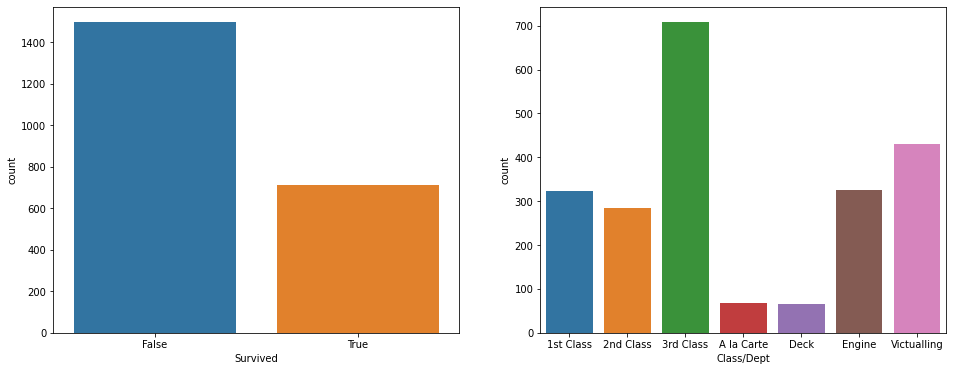

In [22]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.countplot(x="Survived", data=df, ax=axes[0])
sns.countplot(x="Class/Dept", data=df, ax=axes[1])

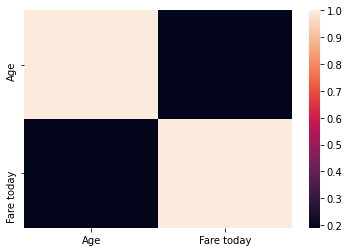

In [23]:
numerical = list(
    set(df.columns)
    - {
        "Class/Dept",
       "Survived",
       "Joined"
    }
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

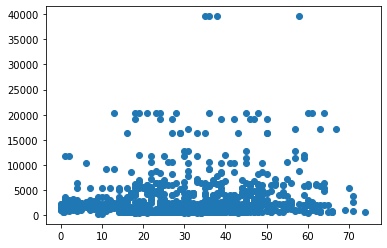

In [25]:
plt.scatter(df["Age"], df["Fare today"])

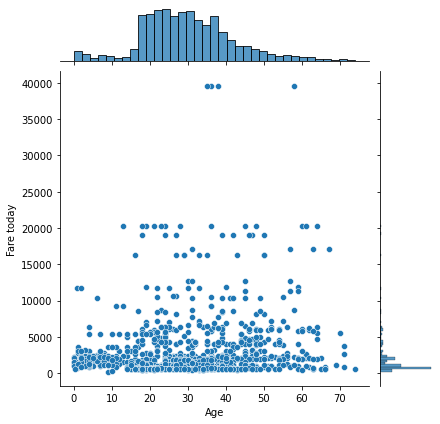

In [26]:
sns.jointplot(x="Age", y="Fare today", data=df, kind="scatter")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


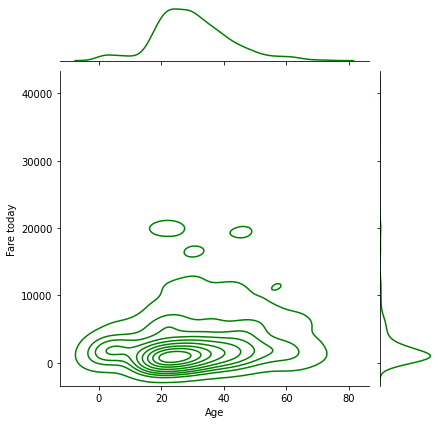

In [27]:
sns.jointplot("Age", "Fare today", data=df, kind="kde", color="g")

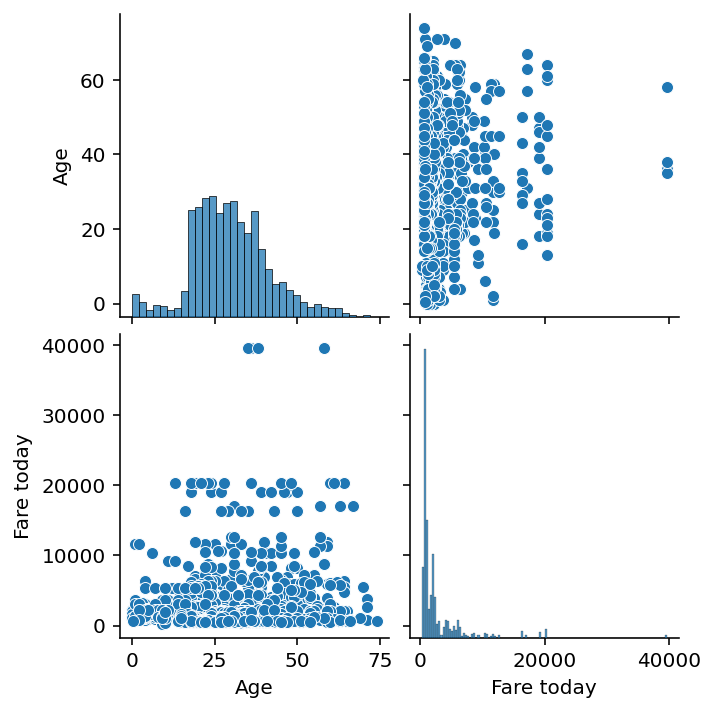

In [28]:
%config InlineBackend.figure_format = "retina"
sns.pairplot(df[numerical])

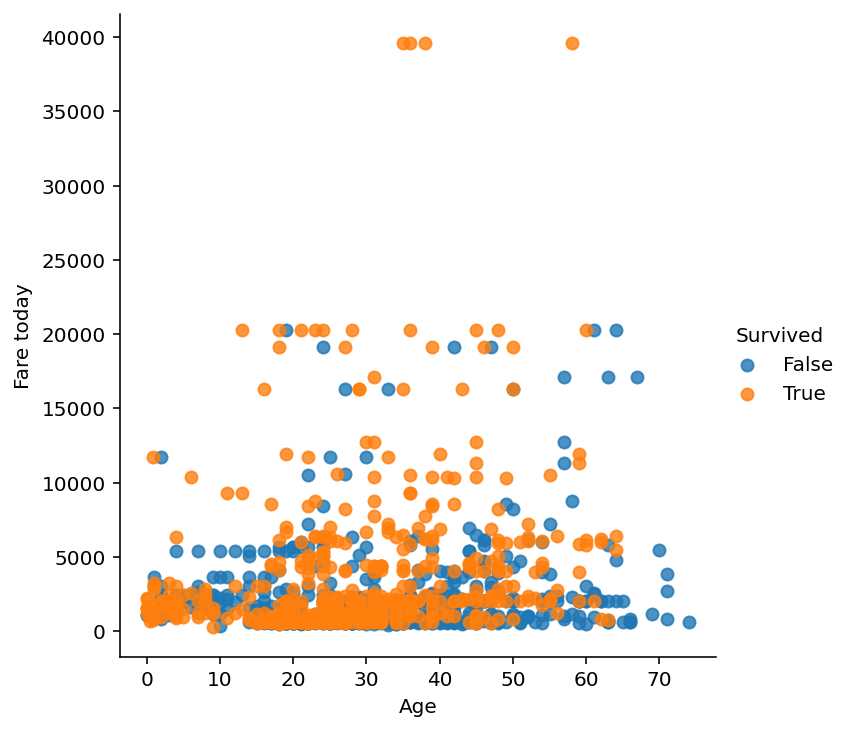

In [29]:
sns.lmplot(x="Age", y="Fare today", data=df, hue="Survived", fit_reg=False)

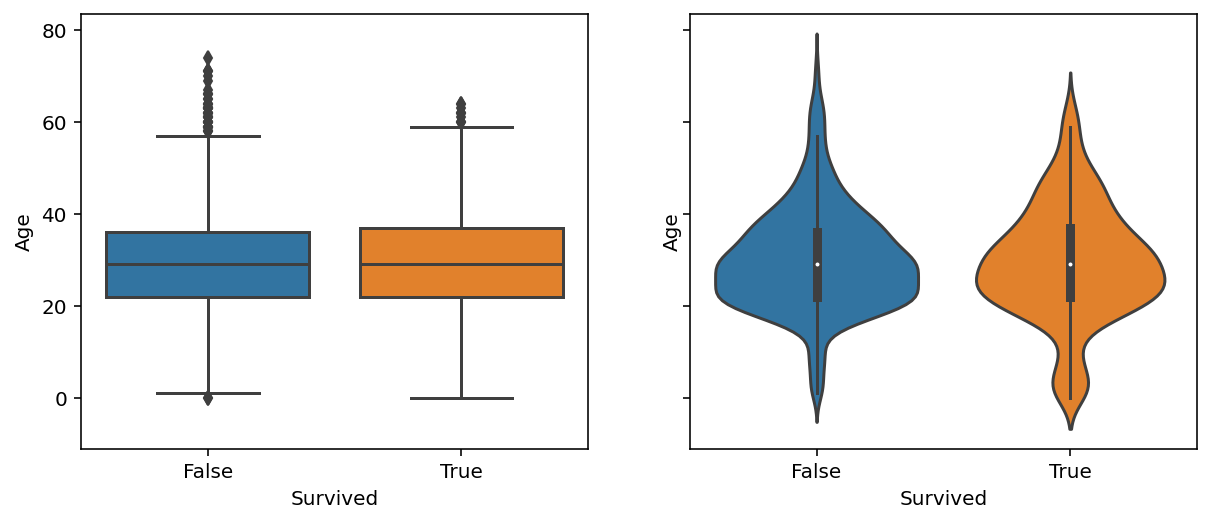

In [30]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Survived", y="Age", data=df, ax=axes[0])
sns.violinplot(x="Survived", y="Age", data=df, ax=axes[1])

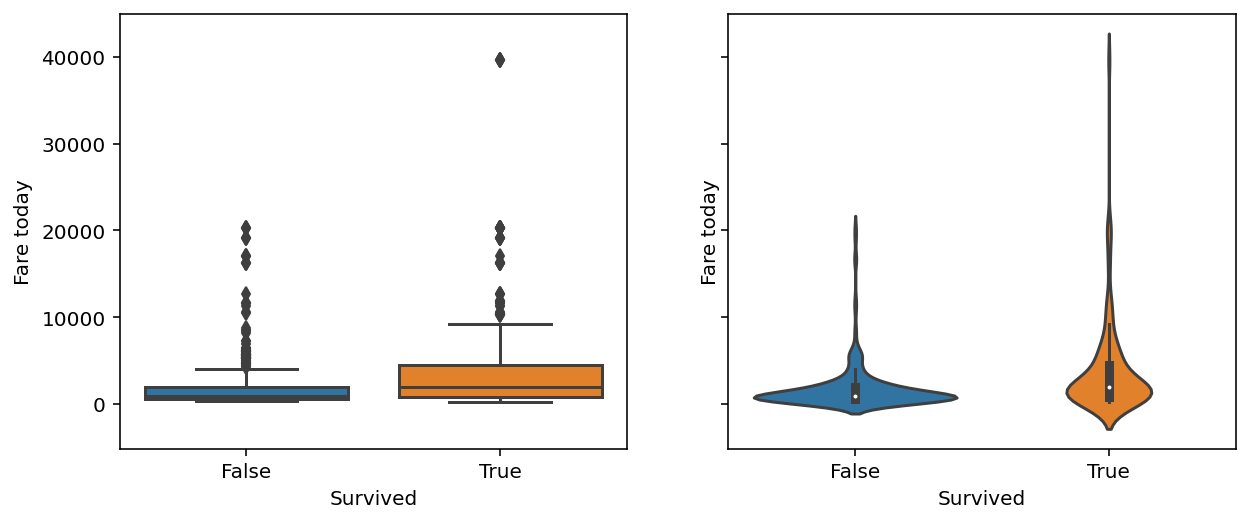

In [31]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Survived", y="Fare today", data=df, ax=axes[0])
sns.violinplot(x="Survived", y="Fare today", data=df, ax=axes[1])

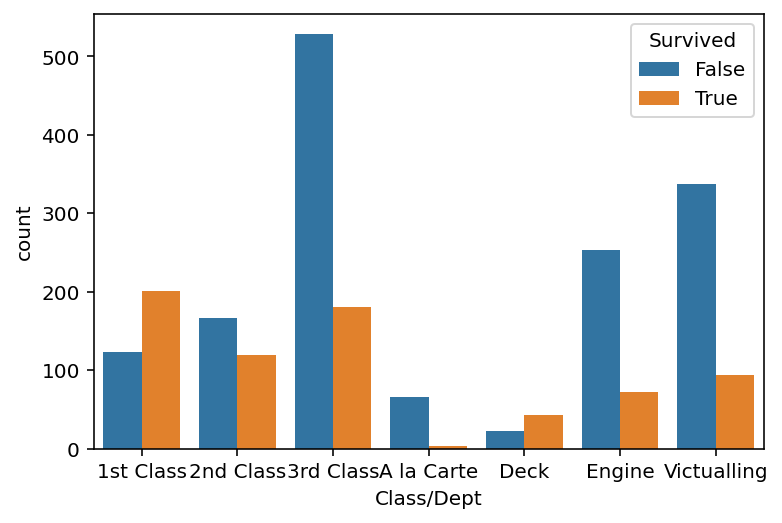

In [32]:
sns.countplot(x="Class/Dept", hue="Survived", data=df)

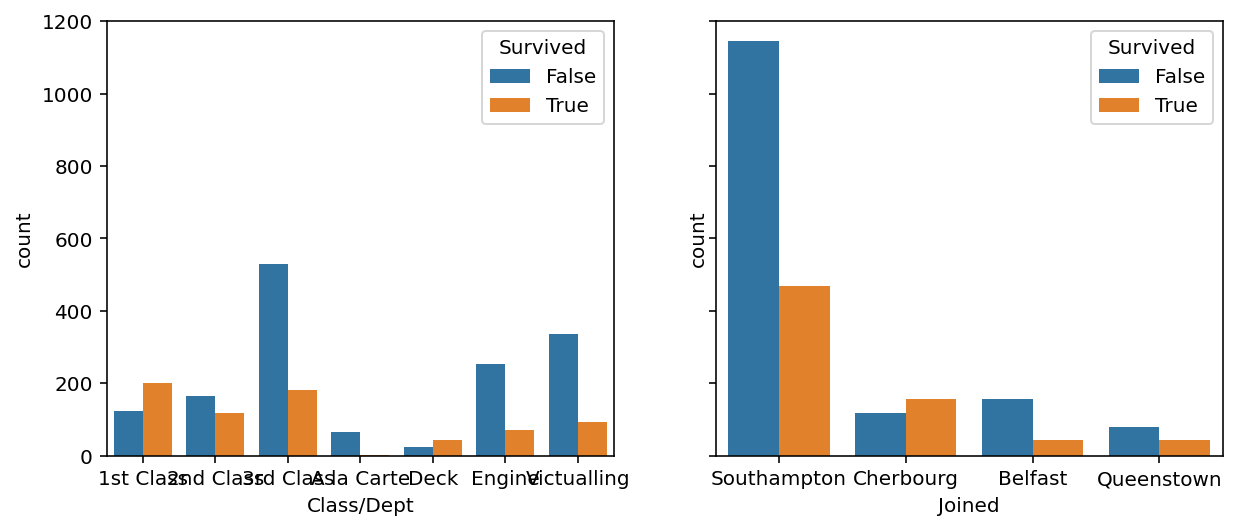

In [34]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="Class/Dept", hue="Survived", data=df, ax=axes[0])
sns.countplot(x="Joined", hue="Survived", data=df, ax=axes[1])

In [36]:
pd.crosstab(df["Joined"], df["Survived"]).T

Joined,Belfast,Cherbourg,Queenstown,Southampton
Survived,,,,
False,155,118,78,1144
True,43,156,42,469


In [37]:
pd.crosstab(df["Class/Dept"], df["Survived"]).T

Class/Dept,1st Class,2nd Class,3rd Class,A la Carte,Deck,Engine,Victualling
Survived,,,,,,,
False,123,166,528,66,23,253,337
True,201,119,180,3,43,72,94


In [38]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [39]:
df.head()

,Age,Class/Dept,Fare today,Joined,Survived
0,29.0,1st Class,16300.0,Southampton,True
1,0.9,1st Class,11700.0,Southampton,True
2,2.0,1st Class,11700.0,Southampton,False
3,30.0,1st Class,11700.0,Southampton,False
4,25.0,1st Class,11700.0,Southampton,False


In [40]:
df["Joined"].value_counts()

Southampton    1613
Cherbourg       274
Belfast         198
Queenstown      120
Name: Joined, dtype: int64

In [104]:
df = pd.read_csv("Titanic_dataset.csv")

In [115]:
X = df.drop(["Survived"], axis=1)
X["Class/Dept"] = X["Class/Dept"].map({"1st Class": 1, "2nd Class": 2, "3rd Class": 3, "A la Carte": 4, "Deck": 5, "Engine": 6, "Victualling": 7})
X["Joined"] = X["Joined"].map({"Southampton": 1, "Cherbourg": 2, "Belfast": 3, "Queenstown": 4})

In [116]:
X = X.fillna(0)

In [117]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [118]:
tsne=TSNE(random_state=17)
tsne_repr=tsne.fit_transform(X_scaled)

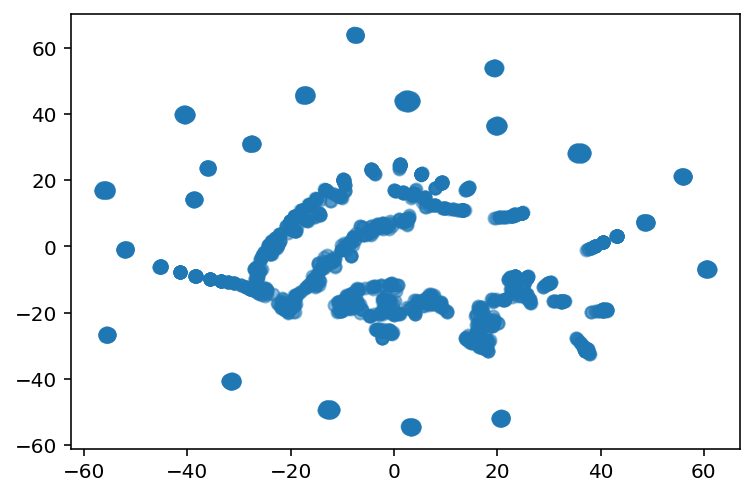

In [119]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5)

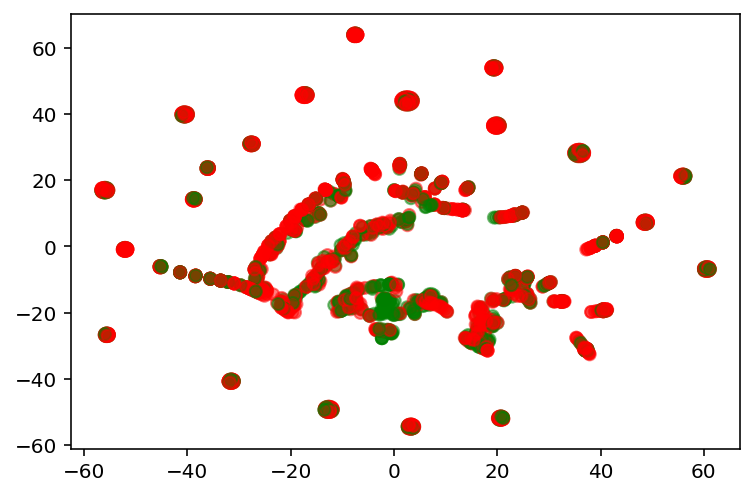

In [120]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Survived"].map({False: "red", True: "green"}),
    alpha=0.5,
)